In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images

!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar0
!pip install pyzbar

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Barcodes Generation** 
Let's generate barcodes using our python-barcode package.

Supported Formats
At the time of this writing, this package supports the following formats:
- EAN-8
- EAN-13
- EAN-14
- UPC-A
- JAN
- ISBN-10
- ISBN-13
- ISSN
- Code 39
- Code 128
- PZN


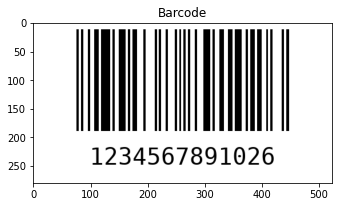

In [2]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open('barcode.png', 'wb') as f:
    EAN13('123456789102', writer=ImageWriter()).write(f)

barcode = cv2.imread("barcode.png")
imshow("Barcode", barcode)

## **QR Code Generation** 
Let's generate QR Codes using our qrcode package.

A QR code (abbreviated from Quick Response code) is a type of matrix barcode (or two-dimensional barcode) first designed in 1994 for the automotive industry in Japan. A barcode is a machine-readable optical label that contains information about the item to which it is attached. In practice, QR codes often contain data for a locator, identifier, or tracker that points to a website or application. A QR code uses four standardized encoding modes (numeric, alphanumeric, byte/binary, and kanji) to store data efficiently; extensions may also be used.

A QR code consists of black squares arranged in a square grid on a white background, which can be read by an imaging device such as a camera, and processed using Reed–Solomon error correction until the image can be appropriately interpreted. The required data is then extracted from patterns that are present in both horizontal and vertical components of the image.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/QR_Code_Structure_Example_3.svg/800px-QR_Code_Structure_Example_3.svg.png)

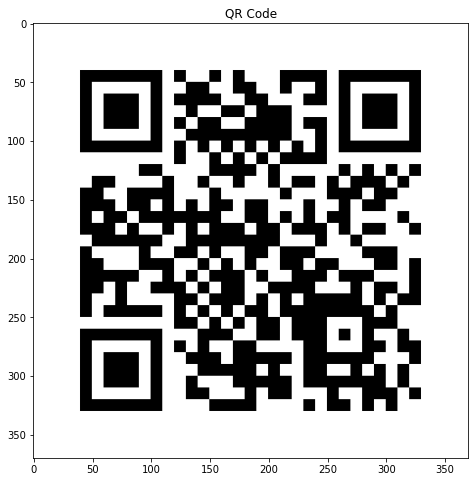

In [3]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data("https://wwww.opencv.org")
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")

qrcode = cv2.imread("qrcode.png")
imshow("QR Code", qrcode, size = 8)

**Configuartion for QR Codes**:

- version — Control the size of the QR Code. It accepts an integer from 1 to 40. Version 1 consists of 21 x 21 matrix.
- error_correction — Control the error correction used for the QR Code.
- box_size — Control the number of pixels of each boxes of the QR code.
- border — Control the boxes thickness of the border. The default is value is 4 which is also the minimum value according to the specification.

There are 4 constants available for error_correction. The higher errors can be corrected, the better it is.

- ERROR_CORRECT_L — About 7% or less errors can be corrected.
- ERROR_CORRECT_M — About 15% or less errors can be corrected. This is the default value.
- ERROR_CORRECT_Q — About 25% or less errors can be corrected.
- ERROR_CORRECT_H — About 30% or less errors can be corrected.

## Detect and Decoding QR Codes

In [4]:
from pyzbar.pyzbar import decode
from PIL import Image

[Point(x=39, y=39), Point(x=39, y=330), Point(x=331, y=331), Point(x=330, y=39)]
QR Code revealed: https://wwww.opencv.org (QRCODE)


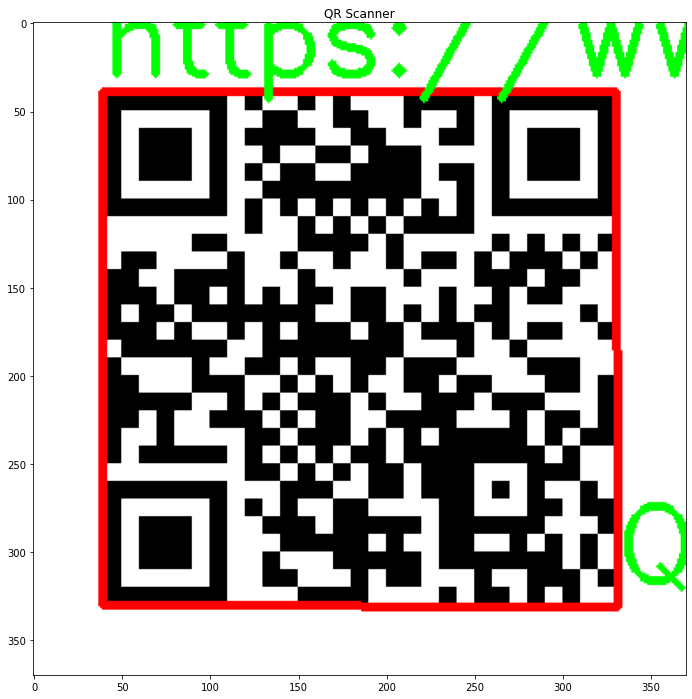

In [8]:
image = cv2.imread("/content/qrcode.png")

# Detect and decode the qrcode
codes = decode(image)

# loop over the detected barcodes
for bc in codes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  print(bc.polygon)
  pt1,pt2,pt3,pt4 = bc.polygon

  # Draw a bounding box over our detected QR code
  pts = np.array( [[pt1.x,pt1.y], [pt2.x,pt2.y], [pt3.x,pt3.y], [pt4.x,pt4.y]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(image, [pts], True, (0,0,255), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our 
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("QR Code revealed: {}".format(text))

# display our output
imshow("QR Scanner", image, size = 12)